<a href="https://colab.research.google.com/github/deepakgoswami7/DEEPAK-GOSWAMI-CS-2023-B-ID-19/blob/main/stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
dataset = pd.read_csv(r'/content/brain data 1.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             100 non-null    object 
 1   age                100 non-null    int64  
 2   hypertension       100 non-null    int64  
 3   heart_disease      100 non-null    int64  
 4   ever_married       100 non-null    object 
 5   work_type          100 non-null    object 
 6   Residence_type     100 non-null    object 
 7   avg_glucose_level  100 non-null    float64
 8   bmi                100 non-null    float64
 9   smoking_status     100 non-null    object 
 10  stroke             100 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 8.7+ KB


In [ ]:
dataset.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,57.030000,0.220000,0.160000,122.557000,28.818000,0.520000
std,21.279978,0.416333,0.368453,58.273247,6.342328,0.502117
min,3.000000,0.000000,0.000000,55.420000,16.000000,0.000000
25%,46.500000,0.000000,0.000000,77.940000,24.750000,0.000000
50%,59.500000,0.000000,0.000000,98.410000,27.700000,1.000000
75%,75.000000,0.000000,0.000000,181.990000,32.575000,1.000000
max,82.000000,1.000000,1.000000,252.720000,48.900000,1.000000


([<matplotlib.axis.YTick at 0x7fa385570490>,
 [Text(0, 0, 'gender'),
  Text(0, 0, 'age'),
  Text(0, 0, 'hypertension'),
  Text(0, 0, 'heart_disease'),
  Text(0, 0, 'ever_married'),
  Text(0, 0, 'work_type')])

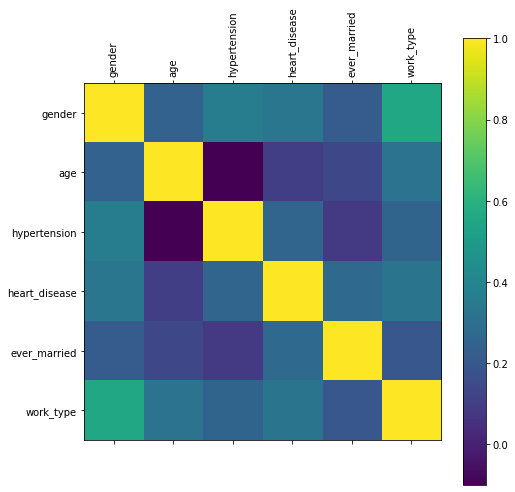

In [ ]:
rcParams['figure.figsize'] = 8,8
plt.matshow(dataset.corr())
plt.colorbar()
plt.xticks(np.arange(6), dataset.columns, rotation = 90)
plt.yticks(np.arange(6), dataset.columns)

In [ ]:
dataset.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,55,0,0,Yes,Private,Urban,55.42,24.8,Unknown,0
1,Male,58,1,0,No,Private,Urban,55.78,27.5,smokes,0
2,Male,58,1,0,Yes,Govt_job,Rural,56.96,26.8,smokes,0
3,Male,79,0,1,Yes,Private,Urban,57.08,22.0,formerly smoked,0
4,Female,44,0,0,Yes,Govt_job,Urban,57.33,24.6,smokes,0


In [ ]:
dataset = dataset.replace('YES',1)
dataset = dataset.replace('NO',0)

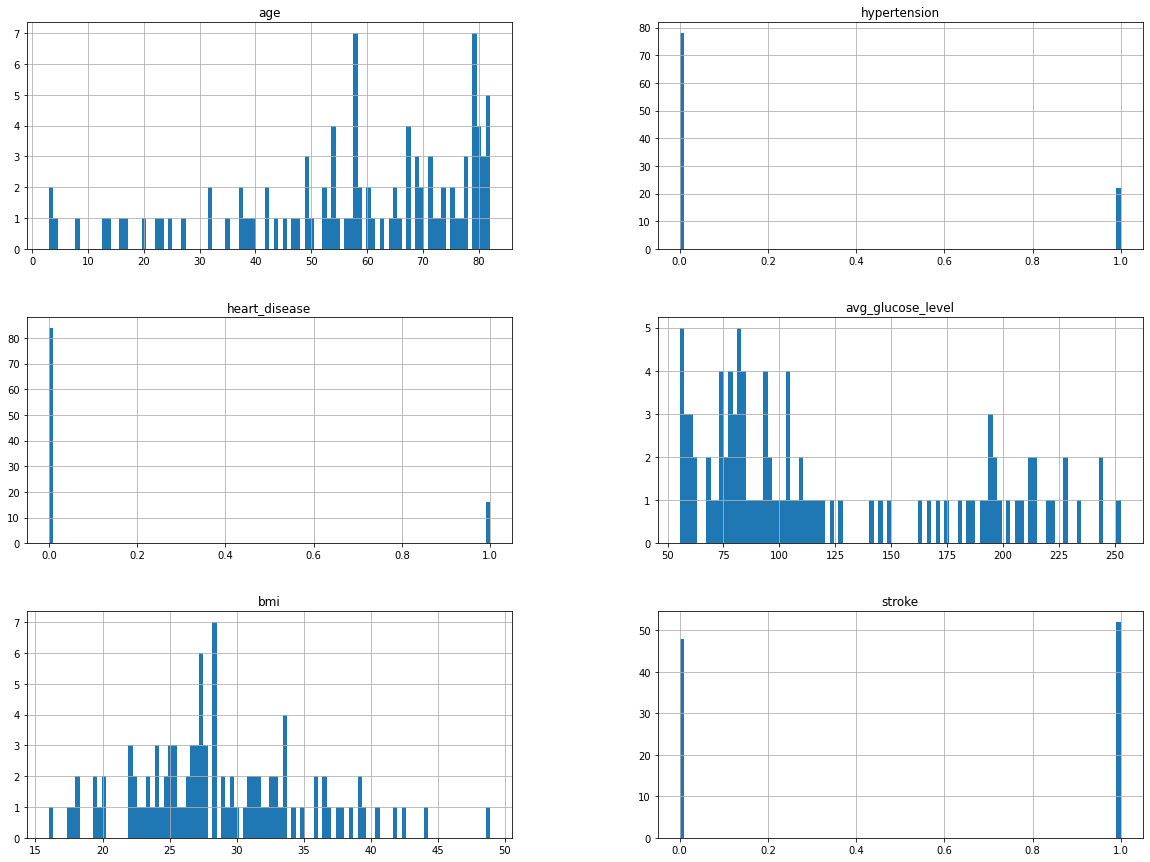

In [ ]:
dataset.hist(bins=100,figsize=(20,15))
plt.show()

In [ ]:
StdSclr = StandardScaler()
columns = ['age','hypertension','heart_disease','avg_glucose_level','bmi',]
dataset[columns] = StdSclr.fit_transform(dataset[columns])

In [ ]:
y = dataset[['stroke']]
x= dataset.drop(['gender','ever_married','work_type','Residence_type','smoking_status','stroke'], axis=1)
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.26, random_state=1)

In [ ]:
#LogisticRegression

LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
print('Accuracy = {}'.format(round(100*LR_model.score(x_test, y_test), 2)))

Accuracy = 76.92


In [ ]:
#K-Neighbours
knn_score_lst = []
for i in range(1, 10):    
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(x_train, y_train)
    knn_score_lst.append(round(100*knn_model.score(x_test, y_test),2))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [ ]:
print(knn_score_lst)

[73.08, 69.23, 73.08, 65.38, 73.08, 73.08, 69.23, 73.08, 73.08]


([<matplotlib.axis.XTick at 0x7fa3848cc7d0>,
 <a list of 11 Text major ticklabel objects>)

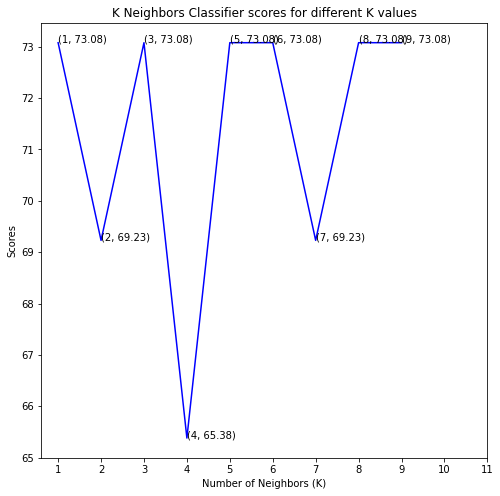

In [ ]:
plt.plot([ i for i in range(1, 10)], knn_score_lst, color = 'blue')
for i in range(1, 10):
    plt.text( i, knn_score_lst[i-1], (i, knn_score_lst[i-1]))
plt.title('K Neighbors Classifier scores for different K values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.xticks([i for i in range( 1, 12)])

In [ ]:
#decision tree

decision_tree_score_lst = []
for i in range(1, len(x.columns) + 1):
    dt_model = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_model.fit(x_train, y_train)
    decision_tree_score_lst.append(round(100*dt_model.score(x_test, y_test), 2))

([<matplotlib.axis.XTick at 0x7fa384e25090>,
 <a list of 5 Text major ticklabel objects>)

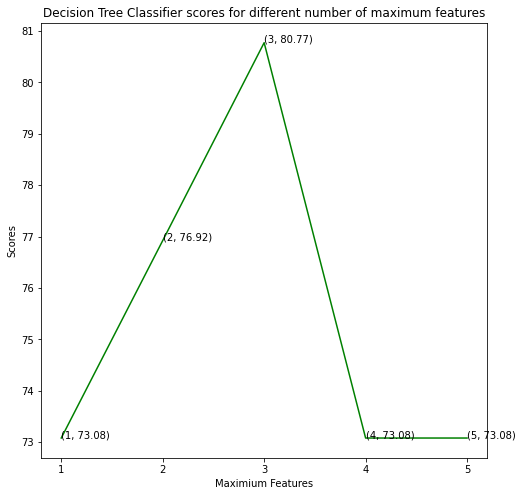

In [ ]:
plt.plot([i for i in range(1, len(x.columns) + 1)], decision_tree_score_lst, color = 'green')
for i in range(1, len(x.columns) + 1):
    plt.text( i, decision_tree_score_lst[i-1], ( i, decision_tree_score_lst[i-1]))
plt.title("Decision Tree Classifier scores for different number of maximum features")
plt.xlabel("Maximium Features")
plt.ylabel("Scores")
plt.xticks([i for i in range(1, len(x.columns) + 1)])

In [ ]:
#svm
svc_score_lst = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in kernels:
    svc_model = SVC(kernel = i)
    svc_model.fit(x_train, y_train)
    svc_score_lst.append(svc_model.score(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

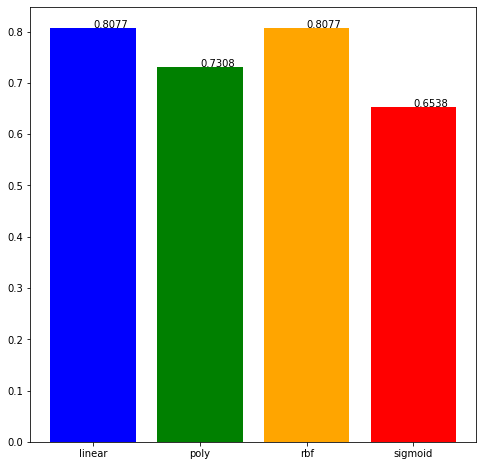

In [ ]:
plt.bar(kernels, svc_score_lst, color = ['blue', 'green', 'orange', 'red'])
for i in range(len(kernels)):
    plt.text(i, svc_score_lst[i], round(svc_score_lst[i], 4))

In [ ]:
#Naive bayes

Nb_model = GaussianNB()

Nb_model.fit(x_train, y_train)

Nb_model.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7307692307692307

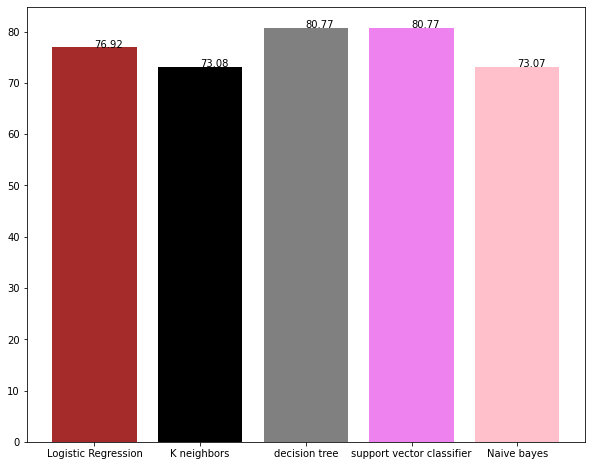

In [ ]:
#ACCURACY CPMPARISON
rcParams['figure.figsize'] = 10,8
lst_x = ['Logistic Regression', 'K neighbors', 'decision tree', 'support vector classifier', 'Naive bayes']
lst_y = [ 76.92, 73.08, 80.77, 80.77, 73.07 ]
plt.bar(lst_x, lst_y, color = ['brown', 'black', 'grey', 'violet', 'pink'])
for i in range(len(lst_y)):
    plt.text(i, lst_y[i], lst_y[i])